  # Information Security Assignment # 3 
# Name:    Neha Shabbir
# Roll No: 20i-0677

# Import Libraries

In [94]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize



# Data Loading And Merging 

In [2]:
FirstDataset=pd.read_csv("malicious_phish.csv")
FirstDataset.head()


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [3]:
SecondDataset=pd.read_csv("spam_dataset.csv")
SecondDataset.head()


,http://astore.amazon.co.uk/allezvinsfrenchr/detail/1904010202/026-8324244-9330038
0,http://archive.salisburyjournal.co.uk/2007/3/6...
1,http://appbasic.jettons.co.uk/links/index.html
2,http://archive.yorkpress.co.uk/2003/11/6/25684...
3,http://acard4u.co.uk/product_reviews.php?cPath...
4,http://amazon.co.uk/s/ref=amb_link_22202665_32...


In [4]:
file_path = 'spam_dataset.csv'
spamdataset=pd.read_csv(file_path, header=None, names=['url'])
spamdataset

,url
0,http://astore.amazon.co.uk/allezvinsfrenchr/de...
1,http://archive.salisburyjournal.co.uk/2007/3/6...
2,http://appbasic.jettons.co.uk/links/index.html
3,http://archive.yorkpress.co.uk/2003/11/6/25684...
4,http://acard4u.co.uk/product_reviews.php?cPath...
...,...
11995,http://archive.salisburyjournal.co.uk/2001/3/7/
11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...
11997,http://archive.thisischeshire.co.uk/2000/1/14/...
11998,http://applerugs.co.uk/rugs/product_info.php?p...


In [5]:
# Add a new column 'type' with the value 'spam'
spamdataset['type'] = 'spam'

# Save the modified dataframe back to CSV
spamdataset.to_csv('spamdataset1.csv', index=False)
dataset=pd.read_csv("spamdataset1.csv")
dataset


,url,type
0,http://astore.amazon.co.uk/allezvinsfrenchr/de...,spam
1,http://archive.salisburyjournal.co.uk/2007/3/6...,spam
2,http://appbasic.jettons.co.uk/links/index.html,spam
3,http://archive.yorkpress.co.uk/2003/11/6/25684...,spam
4,http://acard4u.co.uk/product_reviews.php?cPath...,spam
...,...,...
11995,http://archive.salisburyjournal.co.uk/2001/3/7/,spam
11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,spam
11997,http://archive.thisischeshire.co.uk/2000/1/14/...,spam
11998,http://applerugs.co.uk/rugs/product_info.php?p...,spam


In [6]:
# Concatenate the datasets vertically
df=pd.concat([FirstDataset, dataset], ignore_index=True)
df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
663186,http://archive.salisburyjournal.co.uk/2001/3/7/,spam
663187,http://astore.amazon.co.uk/allezvinsfrenchr/de...,spam
663188,http://archive.thisischeshire.co.uk/2000/1/14/...,spam
663189,http://applerugs.co.uk/rugs/product_info.php?p...,spam


# Preprocessing

In [7]:
#handling missing values
df.isna().sum()

#no missing values


url     0
type    0
dtype: int64

In [8]:
#handling duplicates and outliers 
# Handling Duplicates
df.drop_duplicates(inplace=True)
df

#outliers are not present in this dataset
# Categorize URL Types
df['type'] = df['type'].astype('category')

df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
663186,http://archive.salisburyjournal.co.uk/2001/3/7/,spam
663187,http://astore.amazon.co.uk/allezvinsfrenchr/de...,spam
663188,http://archive.thisischeshire.co.uk/2000/1/14/...,spam
663189,http://applerugs.co.uk/rugs/product_info.php?p...,spam


In [9]:
#encoding categorical variables
#checking for categorical columns
print(df["url"].dtype == "category")
print(df["type"].dtype == "category")


False
True


In [10]:
df2=df.copy()

df2=pd.get_dummies(df, columns=['type'], prefix='type')
df2


,url,type_benign,type_defacement,type_malware,type_phishing,type_spam
0,br-icloud.com.br,0,0,0,1,0
1,mp3raid.com/music/krizz_kaliko.html,1,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,1,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,0,1,0,0,0
4,http://adventure-nicaragua.net/index.php?optio...,0,1,0,0,0
...,...,...,...,...,...,...
663186,http://archive.salisburyjournal.co.uk/2001/3/7/,0,0,0,0,1
663187,http://astore.amazon.co.uk/allezvinsfrenchr/de...,0,0,0,0,1
663188,http://archive.thisischeshire.co.uk/2000/1/14/...,0,0,0,0,1
663189,http://applerugs.co.uk/rugs/product_info.php?p...,0,0,0,0,1


# Exploratory Data Analysis (EDA) And Graphs and Plots

In [11]:
# Descriptive statistics
print(df2.describe())


         type_benign  type_defacement   type_malware  type_phishing  \
count  653046.000000    653046.000000  653046.000000  653046.000000   
mean        0.655513         0.145944       0.036207       0.144082   
std         0.475201         0.353050       0.186806       0.351173   
min         0.000000         0.000000       0.000000       0.000000   
25%         0.000000         0.000000       0.000000       0.000000   
50%         1.000000         0.000000       0.000000       0.000000   
75%         1.000000         0.000000       0.000000       0.000000   
max         1.000000         1.000000       1.000000       1.000000   

           type_spam  
count  653046.000000  
mean        0.018254  
std         0.133870  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


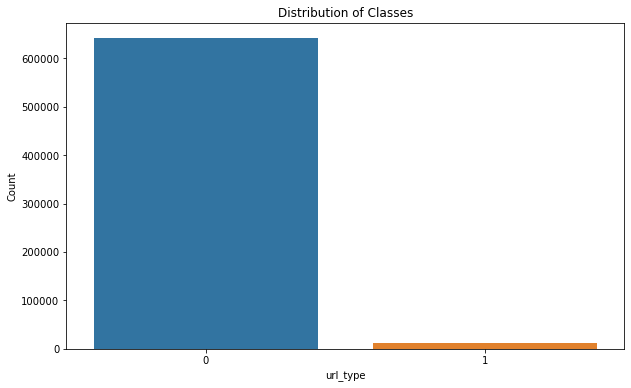

In [12]:
#Visualizing data distributions of spam type

plt.figure(figsize=(10, 6))
sns.countplot(x='type_spam', data=df2)
plt.title('Distribution of Classes')
plt.xlabel('url_type')
plt.ylabel('Count')
plt.show()


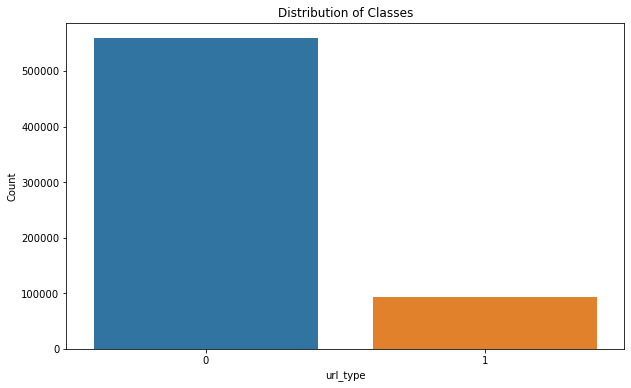

In [13]:
#Visualizing data distributions of spam type

plt.figure(figsize=(10, 6))
sns.countplot(x='type_phishing', data=df2)
plt.title('Distribution of Classes')
plt.xlabel('url_type')
plt.ylabel('Count')
plt.show()


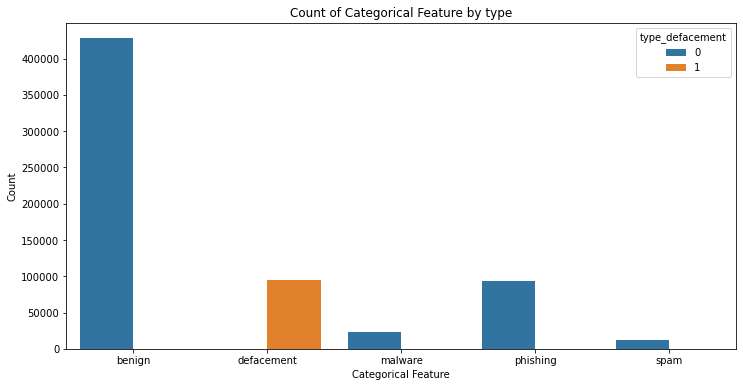

In [14]:
#Exploring relationships between features and the target variable here visualizing the count of each class by category

df1=df2.copy()
df1['type']=df['type']

plt.figure(figsize=(12, 6))
sns.countplot(x='type', hue='type_defacement', data=df1)
plt.title('Count of Categorical Feature by type')
plt.xlabel('Categorical Feature')
plt.ylabel('Count')
plt.show()


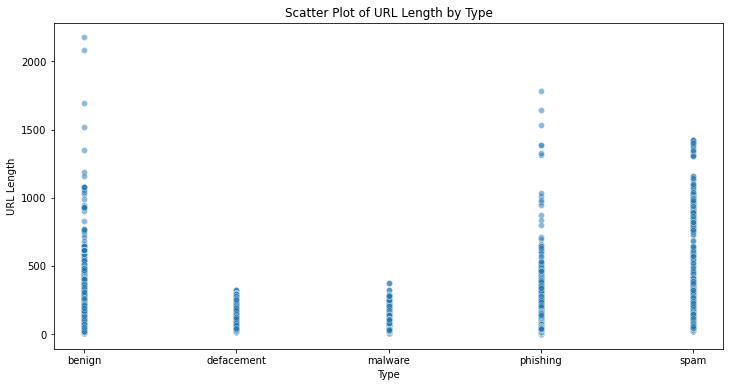

In [28]:
# Scatter plot for URL Length by Class
plt.figure(figsize=(12, 6))
sns.scatterplot(x='type', y='urllength', data=df1, alpha=0.5)
plt.title('Scatter Plot of URL Length by Type')
plt.xlabel('Type')
plt.ylabel('URL Length')
plt.show()



In [17]:
#correlation matrix
correlation_matrix = df2.corr()
correlation_matrix


,type_benign,type_defacement,type_malware,type_phishing,type_spam
type_benign,1.000000,-0.570235,-0.267368,-0.565969,-0.188100
type_defacement,-0.570235,1.000000,-0.080123,-0.169605,-0.056368
type_malware,-0.267368,-0.080123,1.000000,-0.079523,-0.026430
type_phishing,-0.565969,-0.169605,-0.079523,1.000000,-0.055947
type_spam,-0.188100,-0.056368,-0.026430,-0.055947,1.000000


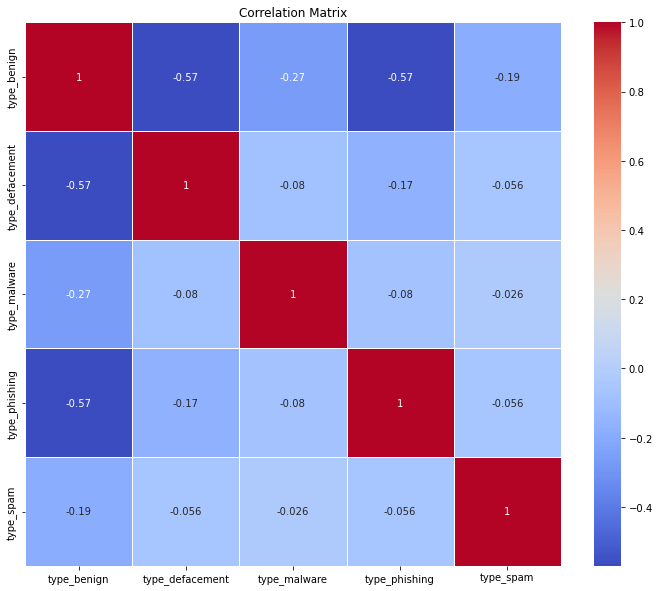

In [18]:
# Heatmap of correlation matrix
correlation_matrix = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [21]:
# Extract features from the 'url' column
df1['url_digits'] = df1['url'].apply(lambda x: len(re.findall(r'\d', x)))
df1['url_special_chars'] = df1['url'].apply(lambda x: len(re.findall(r'[!@#$%^&*(),.?":{}|<>]', x)))
df1


,url,type_benign,type_defacement,type_malware,type_phishing,type_spam,type,urllength,url_digits,url_special_chars
0,br-icloud.com.br,0,0,0,1,0,phishing,16,0,2
1,mp3raid.com/music/krizz_kaliko.html,1,0,0,0,0,benign,35,1,2
2,bopsecrets.org/rexroth/cr/1.htm,1,0,0,0,0,benign,31,1,2
3,http://www.garage-pirenne.be/index.php?option=...,0,1,0,0,0,defacement,88,7,8
4,http://adventure-nicaragua.net/index.php?optio...,0,1,0,0,0,defacement,235,22,6
...,...,...,...,...,...,...,...,...,...,...
663186,http://archive.salisburyjournal.co.uk/2001/3/7/,0,0,0,0,1,spam,47,6,4
663187,http://astore.amazon.co.uk/allezvinsfrenchr/de...,0,0,0,0,1,spam,81,23,4
663188,http://archive.thisischeshire.co.uk/2000/1/14/...,0,0,0,0,1,spam,57,13,5
663189,http://applerugs.co.uk/rugs/product_info.php?p...,0,0,0,0,1,spam,116,25,8


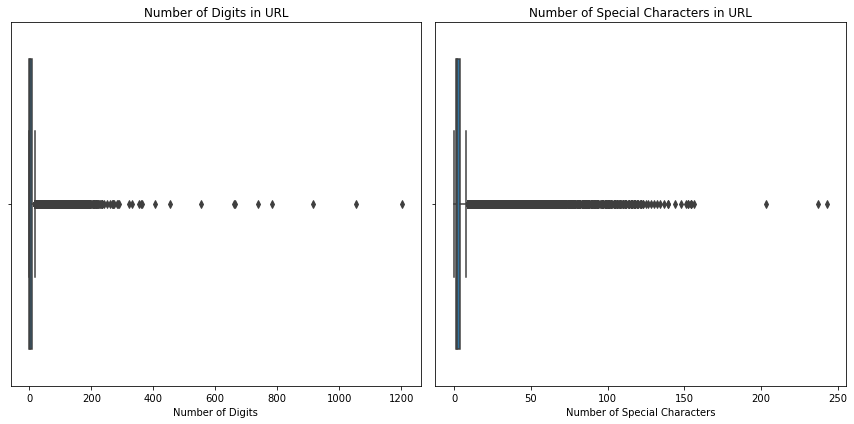

In [23]:
# Visualize URL characteristics
plt.figure(figsize=(12, 6))

# Box plot for the number of digits in the URL
plt.subplot(1, 2, 1)
sns.boxplot(x='url_digits', data=df1)
plt.title('Number of Digits in URL')
plt.xlabel('Number of Digits')

# Box plot for the number of special characters in the URL
plt.subplot(1, 2, 2)
sns.boxplot(x='url_special_chars', data=df1)
plt.title('Number of Special Characters in URL')
plt.xlabel('Number of Special Characters')

plt.tight_layout()
plt.show()



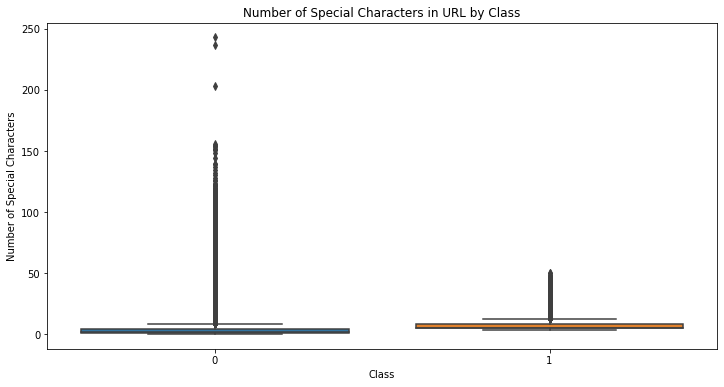

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type_spam', y='url_special_chars', data=df1)
plt.title('Number of Special Characters in URL by Class')
plt.xlabel('Type')
plt.ylabel('Number of Special Characters')
plt.show()



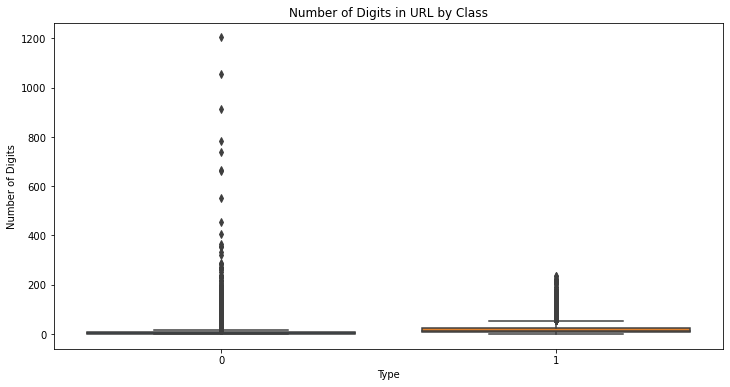

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type_spam', y='url_digits', data=df1)
plt.title('Number of Digits in URL by Class')
plt.xlabel('Type')
plt.ylabel('Number of Digits')
plt.show()



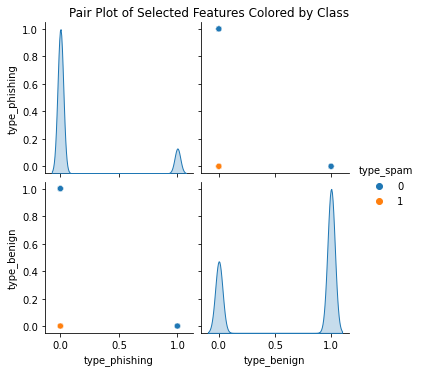

In [27]:
selected_features = ['type_phishing', 'type_benign']  # Replace with actual feature names
sns.pairplot(df2, hue='type_spam', vars=selected_features)
plt.suptitle('Pair Plot of Selected Features Colored by Class', y=1.02)
plt.show()


# Balancing The Datset

In [32]:
# from sklearn.ensemble import RandomForestClassifier

# # Assuming 'type' is the target variable
# class_weights = dict(df['type'].value_counts(normalize=True))
# model = RandomForestClassifier(class_weight=class_weights)

num_samples_per_class = 11000

#creating a new DataFrame with random samples for each class
assignmentdata = pd.concat([
    df[df['type'] == 'phishing'].sample(n=num_samples_per_class, random_state=42),
    df[df['type'] == 'benign'].sample(n=num_samples_per_class, random_state=42),
    df[df['type'] == 'malware'].sample(n=num_samples_per_class, random_state=42),
    df[df['type'] == 'defacement'].sample(n=num_samples_per_class, random_state=42),
    df[df['type'] == 'spam'].sample(n=num_samples_per_class, random_state=42)
], ignore_index=True)

# Shuffle the DataFrame
assignmentdata = shuffle(assignmentdata, random_state=42).reset_index(drop=True)

assignmentdata1=pd.get_dummies(assignmentdata, columns=['type'], prefix='type')
assignmentdata1



,url,type_benign,type_defacement,type_malware,type_phishing,type_spam
0,http://polskizwiazekpokera.org/index.php?optio...,0,1,0,0,0
1,https://mitsui-jyuku.mixh.jp/uploads/48043fvas...,0,0,1,0,0
2,http://amber.ch.ic.ac.uk/archive/all/4002.html,0,0,0,0,1
3,'9d345009-a-62cb3a1a-s-sites.googlegroups.com/...,1,0,0,0,0
4,http://113.98.242.211:49851/.i,0,0,1,0,0
...,...,...,...,...,...,...
54995,http://aolshop.memberoffers.co.uk/csp/smp/aol/...,0,0,0,0,1
54996,http://3wjobs.co.uk/cddcbbA.html,0,0,0,0,1
54997,http://www.zari-dzaferi.ch/index.php?option=co...,0,1,0,0,0
54998,http://kadubeureum-serang.desa.id/wp-content/a...,0,0,0,1,0


# URL Feature Extraction

In [33]:
#extracting features from the 'url' column

assignmentdata1['url_length'] = assignmentdata1['url'].apply(len)
assignmentdata1['url_digits'] = assignmentdata1['url'].apply(lambda x: len(re.findall(r'\d', x)))
assignmentdata1['url_special_chars'] = assignmentdata1['url'].apply(lambda x: len(re.findall(r'[!@#$%^&*(),.?":{}|<>]', x)))
assignmentdata1['num_subdomains'] = assignmentdata1['url'].apply(lambda x: x.count('.') - 1)  
assignmentdata1['uses_https'] = assignmentdata1['url'].apply(lambda x: 1 if x.startswith('https') else 0)
assignmentdata1['contains_ip'] = assignmentdata1['url'].apply(lambda x: 1 if re.match(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b', x) else 0)



In [34]:
assignmentdata1

,url,type_benign,type_defacement,type_malware,type_phishing,type_spam,url_length,url_digits,url_special_chars,num_subdomains,uses_https,contains_ip
0,http://polskizwiazekpokera.org/index.php?optio...,0,1,0,0,0,115,6,9,1,0,0
1,https://mitsui-jyuku.mixh.jp/uploads/48043fvas...,0,0,1,0,0,52,5,4,2,1,0
2,http://amber.ch.ic.ac.uk/archive/all/4002.html,0,0,0,0,1,46,4,6,4,0,0
3,'9d345009-a-62cb3a1a-s-sites.googlegroups.com/...,1,0,0,0,0,345,44,7,2,0,0
4,http://113.98.242.211:49851/.i,0,0,1,0,0,30,16,6,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54995,http://aolshop.memberoffers.co.uk/csp/smp/aol/...,0,0,0,0,1,187,37,14,4,0,0
54996,http://3wjobs.co.uk/cddcbbA.html,0,0,0,0,1,32,1,4,2,0,0
54997,http://www.zari-dzaferi.ch/index.php?option=co...,0,1,0,0,0,116,2,10,2,0,0
54998,http://kadubeureum-serang.desa.id/wp-content/a...,0,0,0,1,0,122,0,7,3,0,0


In [64]:
le = LabelEncoder()
assignmentdata1['encodedtype'] = le.fit_transform(assignmentdata['type'])
assignmentdata1


,url,type_benign,type_defacement,type_malware,type_phishing,type_spam,url_length,url_digits,url_special_chars,num_subdomains,uses_https,contains_ip,encodedtype
0,http://polskizwiazekpokera.org/index.php?optio...,0,1,0,0,0,115,6,9,1,0,0,1
1,https://mitsui-jyuku.mixh.jp/uploads/48043fvas...,0,0,1,0,0,52,5,4,2,1,0,2
2,http://amber.ch.ic.ac.uk/archive/all/4002.html,0,0,0,0,1,46,4,6,4,0,0,4
3,'9d345009-a-62cb3a1a-s-sites.googlegroups.com/...,1,0,0,0,0,345,44,7,2,0,0,0
4,http://113.98.242.211:49851/.i,0,0,1,0,0,30,16,6,3,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,http://aolshop.memberoffers.co.uk/csp/smp/aol/...,0,0,0,0,1,187,37,14,4,0,0,4
54996,http://3wjobs.co.uk/cddcbbA.html,0,0,0,0,1,32,1,4,2,0,0,4
54997,http://www.zari-dzaferi.ch/index.php?option=co...,0,1,0,0,0,116,2,10,2,0,0,1
54998,http://kadubeureum-serang.desa.id/wp-content/a...,0,0,0,1,0,122,0,7,3,0,0,3


In [72]:
X_train, X_test, y_train, y_test = train_test_split(assignmentdata1[['url','url_length', 'url_digits', 'url_special_chars', 'num_subdomains', 'uses_https', 'contains_ip']],
                                                    assignmentdata1['encodedtype'],
                                                    test_size=0.2,
                                                    random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['url'])
X_test_vectorized = vectorizer.transform(X_test['url'])




# Model 1

In [73]:
model_lr = LogisticRegression()
model_lr.fit(X_train_vectorized, y_train)
y_pred_lr = model_lr.predict(X_test_vectorized)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr)*100)
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression:
Accuracy: 92.98181818181817
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      2165
           1       0.97      0.99      0.98      2268
           2       0.99      0.94      0.97      2192
           3       0.88      0.80      0.84      2196
           4       1.00      1.00      1.00      2179

    accuracy                           0.93     11000
   macro avg       0.93      0.93      0.93     11000
weighted avg       0.93      0.93      0.93     11000

Confusion Matrix:
 [[1982   13    8  162    0]
 [   0 2250    2   14    2]
 [  38   20 2070   64    0]
 [ 382   47   18 1747    2]
 [   0    0    0    0 2179]]


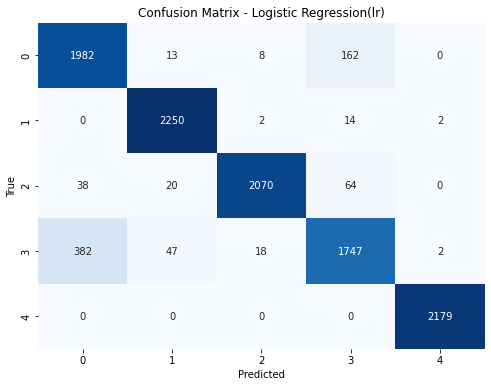

In [90]:
# Confusion Matrix
conf_matrix_lr= confusion_matrix(y_test, y_pred_lr)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression(lr)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Model 2

In [75]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_vectorized, y_train)
y_pred_rf = model_rf.predict(X_test_vectorized)


In [76]:
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf)*100)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest:
Accuracy: 93.13636363636364
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.87      2165
           1       0.96      0.99      0.98      2268
           2       0.99      0.94      0.97      2192
           3       0.88      0.80      0.84      2196
           4       1.00      1.00      1.00      2179

    accuracy                           0.93     11000
   macro avg       0.93      0.93      0.93     11000
weighted avg       0.93      0.93      0.93     11000

Confusion Matrix:
 [[2004    9    6  146    0]
 [   3 2246    1   16    2]
 [  32   16 2070   74    0]
 [ 382   58    8 1746    2]
 [   0    0    0    0 2179]]


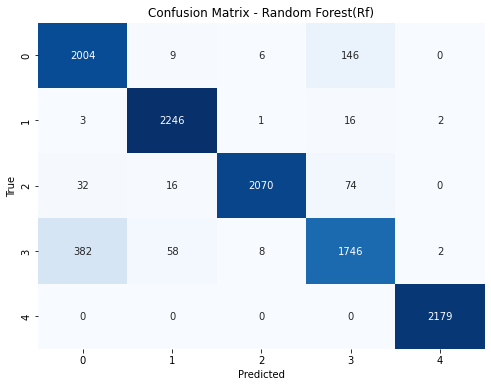

In [91]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest(Rf)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Model 3

In [77]:
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train_vectorized, y_train)
y_pred_svm = model_svm.predict(X_test_vectorized)


In [78]:

print("\nSupport Vector Machine (SVM):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm)*100)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



Support Vector Machine (SVM):
Accuracy: 93.95454545454545
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      2165
           1       0.97      1.00      0.98      2268
           2       0.99      0.95      0.97      2192
           3       0.83      0.90      0.86      2196
           4       1.00      1.00      1.00      2179

    accuracy                           0.94     11000
   macro avg       0.94      0.94      0.94     11000
weighted avg       0.94      0.94      0.94     11000

Confusion Matrix:
 [[1853    7    9  296    0]
 [   0 2257    0   10    1]
 [  13   15 2074   90    0]
 [ 163   45   14 1972    2]
 [   0    0    0    0 2179]]


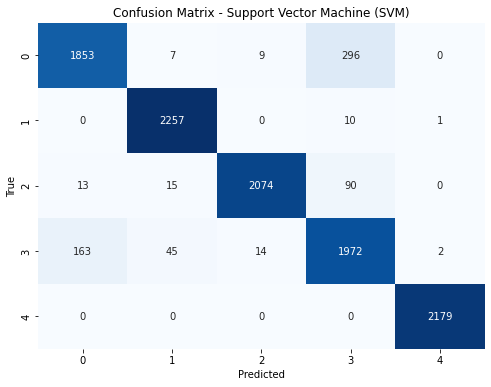

In [85]:
# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


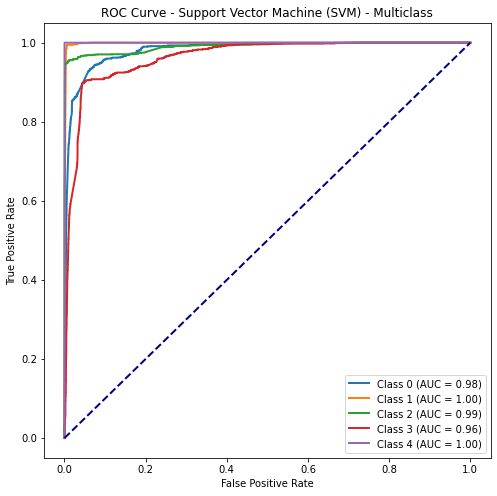

In [96]:
# Binarize the labels
y_test_bin = label_binarize(y_test, classes=model_svm.classes_)

# Get the decision function scores for each class
y_probs_svm = model_svm.decision_function(X_test_vectorized)

# Initialize variables for ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(len(model_svm.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs_svm[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(len(model_svm.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {model_svm.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine (SVM) - Multiclass')
plt.legend(loc='lower right')
plt.show()



# Model 4

In [81]:

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_vectorized, y_train)
y_pred_dt = model_dt.predict(X_test_vectorized)



In [82]:

print("\n Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt)*100)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))



 Decision Tree:
Accuracy: 93.0909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88      2165
           1       0.97      0.98      0.97      2268
           2       0.98      0.94      0.96      2192
           3       0.82      0.87      0.84      2196
           4       1.00      1.00      1.00      2179

    accuracy                           0.93     11000
   macro avg       0.93      0.93      0.93     11000
weighted avg       0.93      0.93      0.93     11000

Confusion Matrix:
 [[1862    1   11  291    0]
 [   5 2228    2   32    1]
 [  18   17 2058   99    0]
 [ 196   57   28 1913    2]
 [   0    0    0    0 2179]]


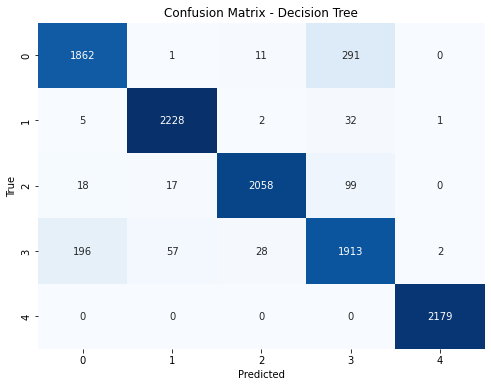

In [83]:
# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
